In [1]:
import torch

# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


100% (117 of 117) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


tensor([[ 3.1566e+02, -5.7091e-01, -5.7194e-01,  ..., -3.0335e-01,
         -3.1285e-01,  0.0000e+00],
        [-5.7091e-01,  3.1565e+02, -5.7657e-01,  ..., -3.0558e-01,
         -3.1279e-01,  0.0000e+00],
        [-5.7194e-01, -5.7657e-01,  3.1565e+02,  ..., -3.1158e-01,
         -3.1742e-01,  0.0000e+00],
        ...,
        [-3.0335e-01, -3.0558e-01, -3.1158e-01,  ...,  3.1532e+02,
         -8.7292e-01,  0.0000e+00],
        [-3.1285e-01, -3.1279e-01, -3.1742e-01,  ..., -8.7292e-01,
          3.1538e+02,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  3.1623e+02]])


/home/elhamod/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


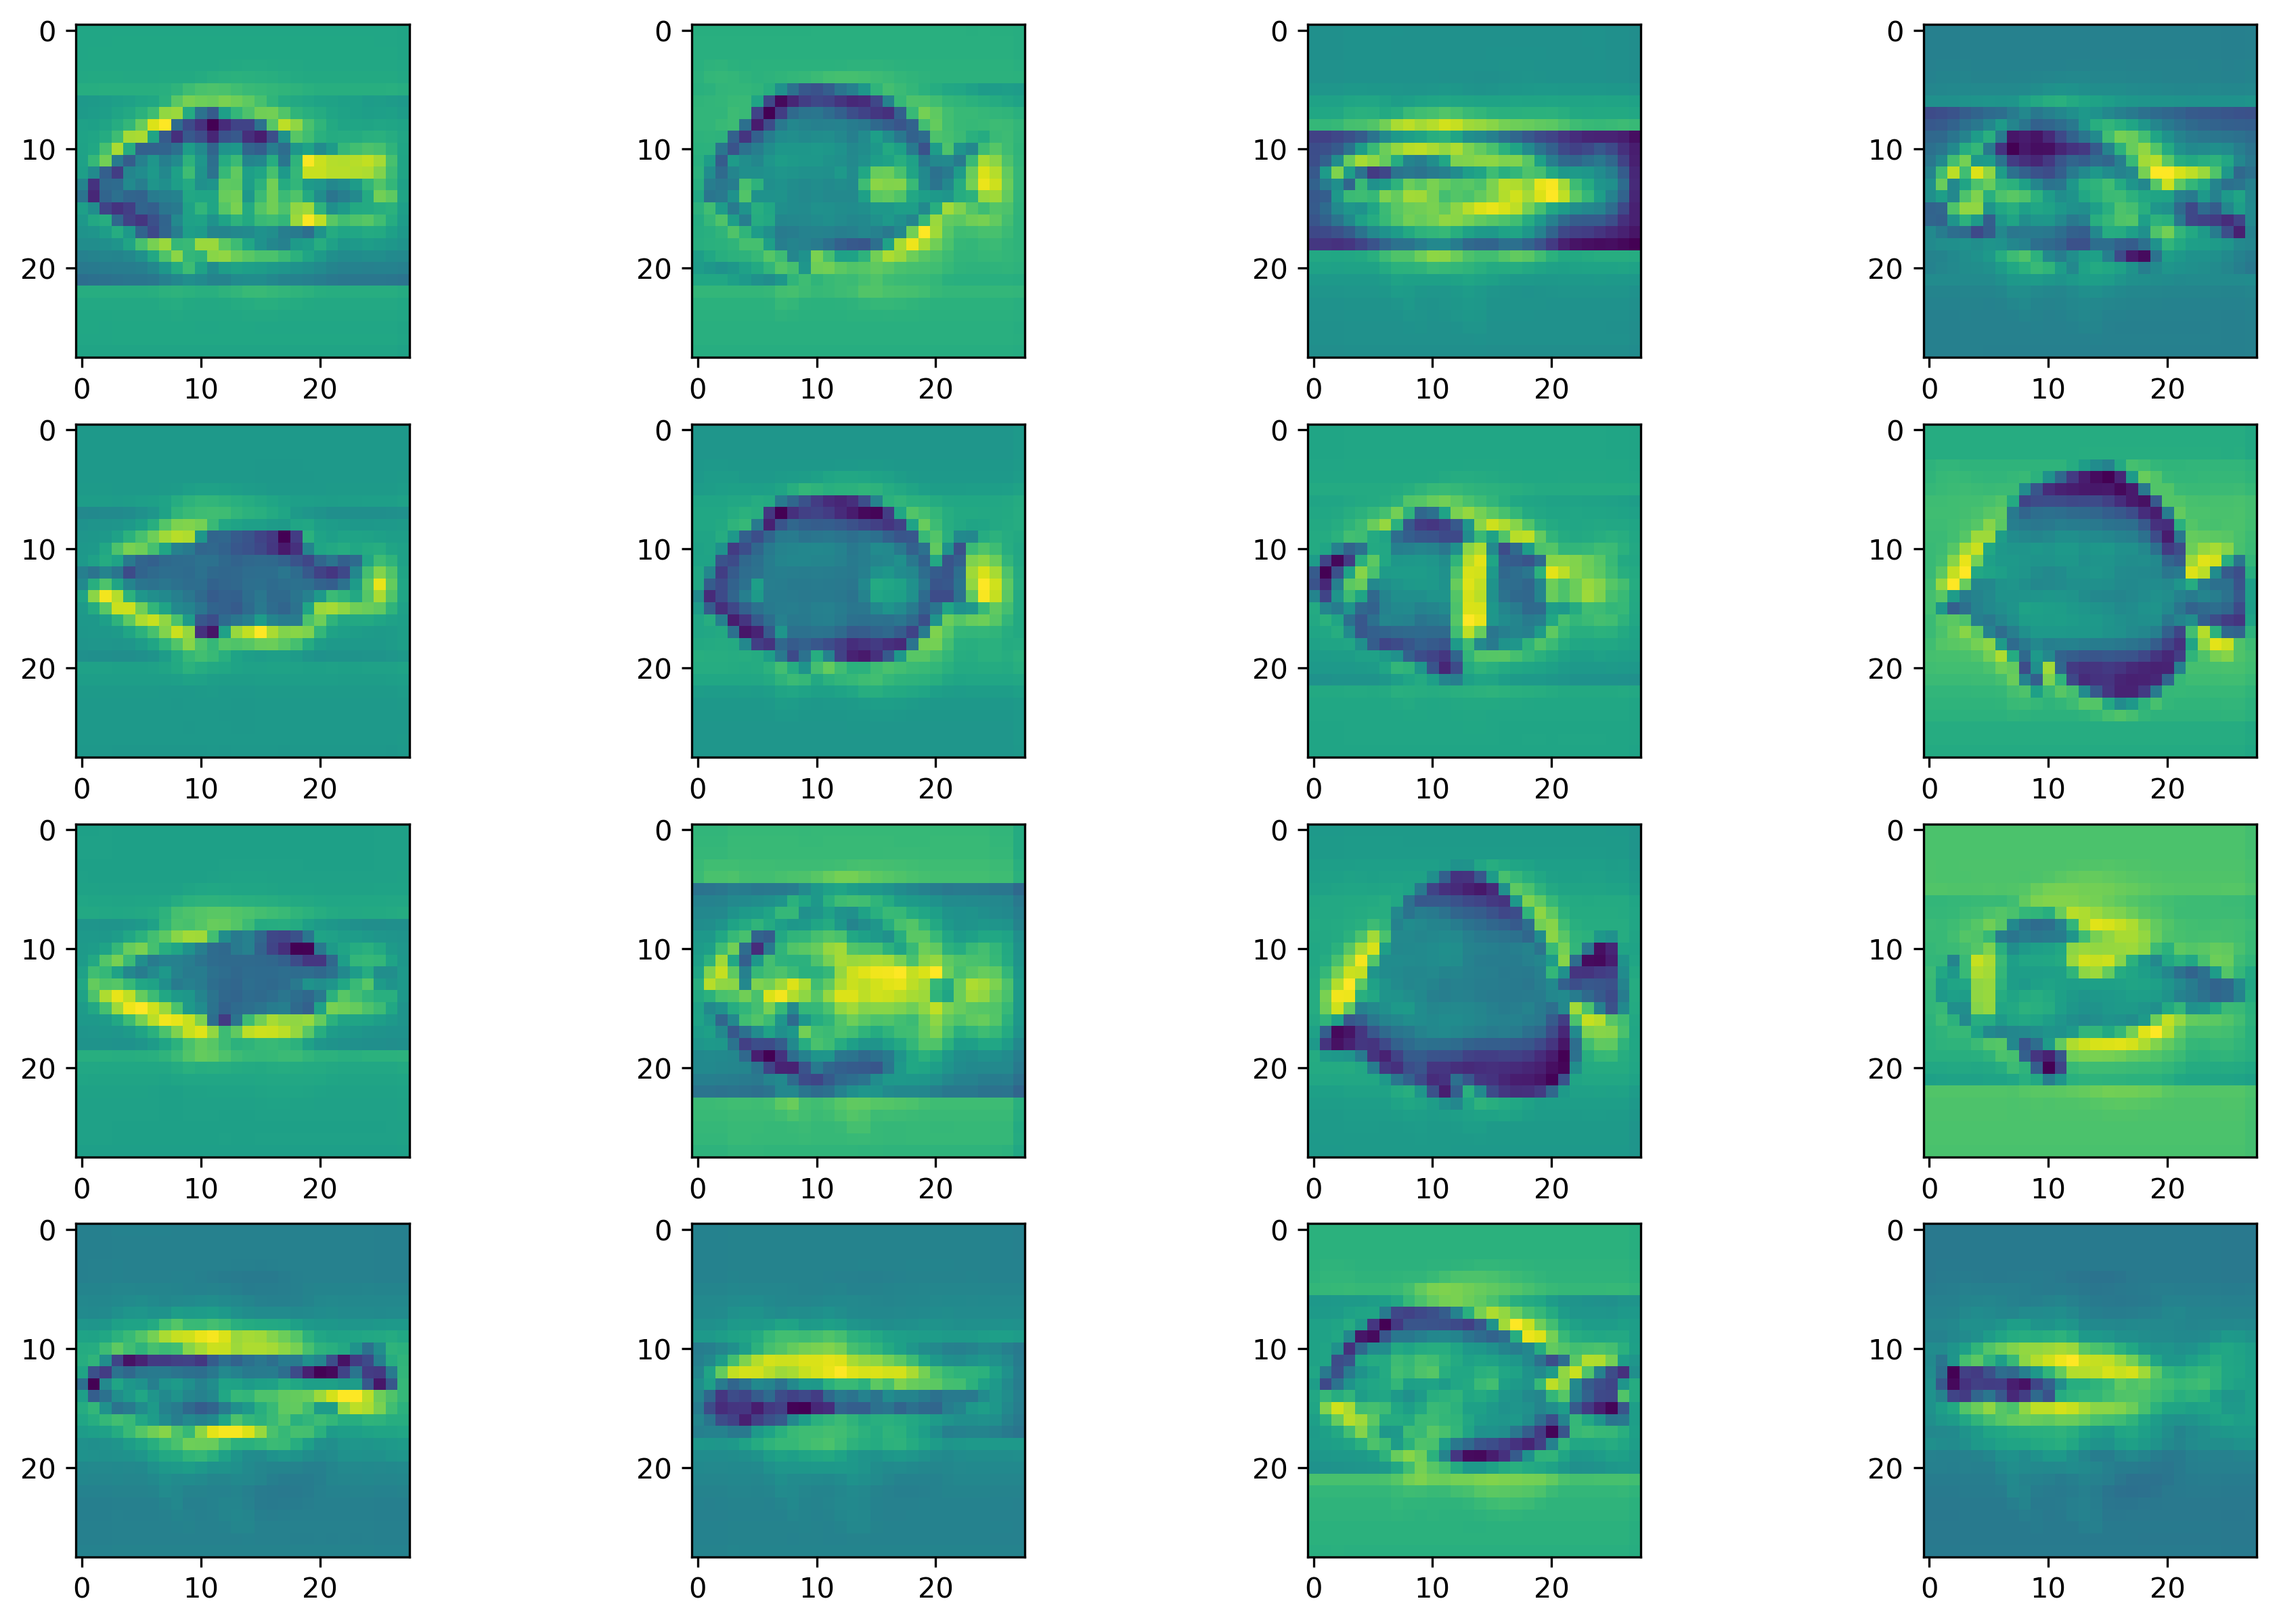

In [2]:
%matplotlib inline

from torchvision import transforms, datasets
import dataLoader
import torch
import matplotlib.pyplot as plt

# import numpy as np

# temp= datasets.CIFAR10(root = 'cifar10/' ,
#                               train = True,
#                               download = True)


# #normalize the data to [0 1] range
# temp.data=temp.data/255
# print(temp.data.shape)
# mean=(temp.data.mean(axis=0))
# std=(temp.data.std(axis=0))
# print(mean.shape)
# print(std.shape)
# temp.data=np.multiply(1/std,np.add(temp.data,-mean)) 
# print(temp.data.shape)
# temp.data = temp.data.reshape(-1, temp.data.shape[1]*temp.data.shape[2]*temp.data.shape[3])
# print(temp.data.shape)
    
imgH = 28
n_channels = 1
batch_size = 4

image_path = "./Fish_toy/images"

dataset = dataLoader.FishDataset(image_path, imgH, n_channels)

loader = torch.utils.data.DataLoader(dataset=dataset,
                                      batch_size=4,
                                      shuffle=False       
                                             )
fig, axes = plt.subplots(4, 4, figsize=(15, 10), dpi= 300)

itr = iter(loader)
for i, ax in enumerate(axes.flat):
    batch = next(itr)
    img = batch['image'][0].squeeze()
    if len(img.shape) == 3:
        img = img.permute(1, 2, 0)
    ax.imshow(img.cpu().detach().numpy())
    
fig.show()
